In [ ]:
'''
Pre-release Notice

This repository contains code associated with our ongoing research project titled "An insight into the technological landscape and competitive situation of biodegradable PBAT industry based on multidimensional patent analysis". The code is being made available for **review purposes only** and is subject to the following restrictions:

1. Non-commercial use only: This code may only be used for academic or non-commercial purposes.
2. No redistribution or modification**: Redistribution or modification of this code is not permitted until the associated research paper has been officially published.
3. Temporary access: The code in this repository is subject to updates and may change without notice until the final release.

After the publication of the corresponding research paper, we plan to release the code under a more permissive open-source license (e.g., MIT License).

For any questions or specific permissions, please contact zhangx2293@gmail.com with the subject "Pre-release Code Inquiry".

Written by Xiang Zhang
'''

In [1]:
library(stm)
library(readr)
library(ggplot2)
library(slam)

Warning message:
"package 'stm' was built under R version 4.2.3"
stm v1.3.7 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com

Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [2]:
dtm <- read.csv("DTM.csv", header = TRUE, row.names = 1)

# read data
dtm <- as.matrix(dtm)
# create a vocab
vocab <- colnames(dtm)

# create documents
documents <- lapply(1:nrow(dtm), function(i) {
  doc <- dtm[i, ]
  words <- which(doc > 0)
  counts <- doc[words]
  matrix(c(words, counts), nrow = 2, byrow = TRUE)
})

str(documents)

List of 2576
 $ : int [1:2, 1:15] 23 3 729 1 2278 1 3821 3 5047 3 ...
 $ : int [1:2, 1:22] 158 1 2160 1 3006 1 3163 1 3401 1 ...
 $ : int [1:2, 1:17] 158 2 492 1 2160 1 2234 1 2306 1 ...
 $ : int [1:2, 1:16] 658 1 2124 2 2160 1 3887 1 4874 1 ...
 $ : int [1:2, 1:42] 185 2 313 4 729 1 776 1 1244 1 ...
 $ : int [1:2, 1:69] 313 2 576 1 717 2 786 1 2098 1 ...
 $ : int [1:2, 1:57] 47 1 152 1 158 1 280 4 323 1 ...
 $ : int [1:2, 1:37] 158 2 280 2 576 1 1563 2 2160 1 ...
 $ : int [1:2, 1:23] 1215 2 2738 2 3404 3 3408 1 4050 1 ...
 $ : int [1:2, 1:48] 33 1 75 1 185 2 280 2 301 2 ...
 $ : int [1:2, 1:20] 23 1 1148 1 2708 1 3660 1 3852 1 ...
 $ : int [1:2, 1:30] 176 1 185 4 313 1 787 1 1545 2 ...
 $ : int [1:2, 1:41] 62 2 183 2 313 2 539 2 661 2 ...
 $ : int [1:2, 1:24] 21 1 752 1 801 1 879 1 2124 1 ...
 $ : int [1:2, 1:16] 717 1 2035 1 2124 1 2455 2 5309 1 ...
 $ : int [1:2, 1:27] 161 4 313 1 479 4 539 1 801 1 ...
 $ : int [1:2, 1:19] 50 1 78 2 158 1 601 1 1994 2 ...
 $ : int [1:2, 1:38] 612 7 

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	.....
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
.......................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -7.157) 
.......................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.059, relative change = 1.369e-02) 
.......................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -7.002, relative ch

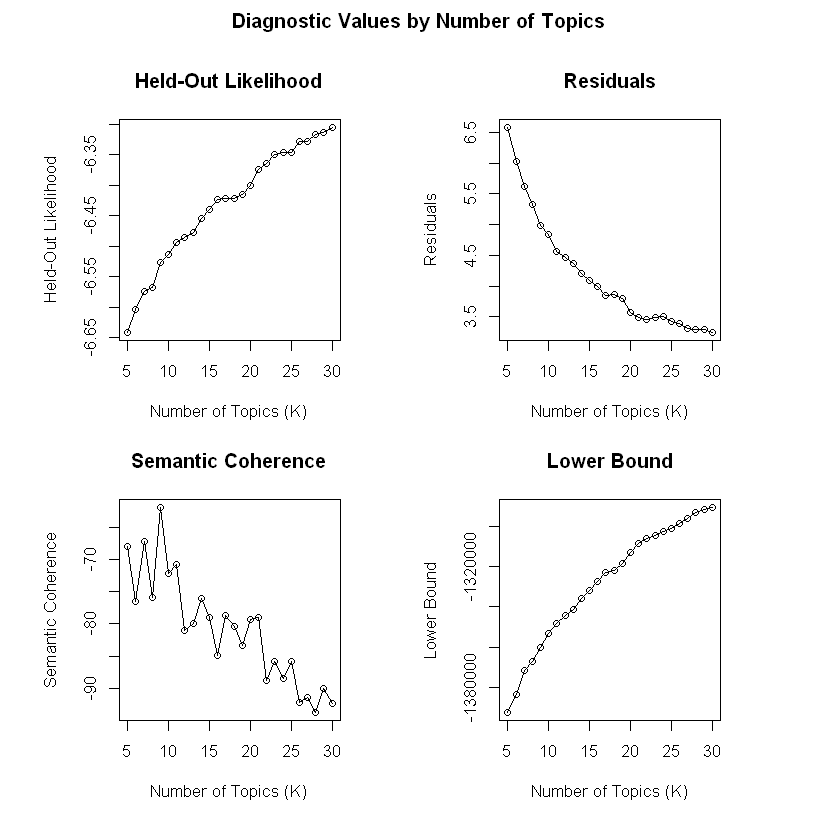

In [4]:
# set the number of topics to search over
candidate_K <- c(5:30)

# calculate 
heldout_results <- searchK(documents = documents, vocab = vocab, K = candidate_K, data = data.frame(doc_id = 1:nrow(dtm)), init.type = "Spectral")

plot(heldout_results)

# calculate coherence and exclusivity for each K
result_list <- list()
for (k in candidate_K) {
  model <- stm(documents = documents, vocab = vocab, K = k, data = data.frame(doc_id = 1:nrow(dtm)), init.type = "Spectral")
  result_list[[as.character(k)]] <- list(model = model, coherence = semanticCoherence(model, documents), exclusivity = exclusivity(model))
}

coherence_values <- sapply(result_list, function(x) mean(x$coherence))
exclusivity_values <- sapply(result_list, function(x) mean(x$exclusivity))
df <- data.frame(K = candidate_K, Coherence = coherence_values, Exclusivity = exclusivity_values)
# The higher the better

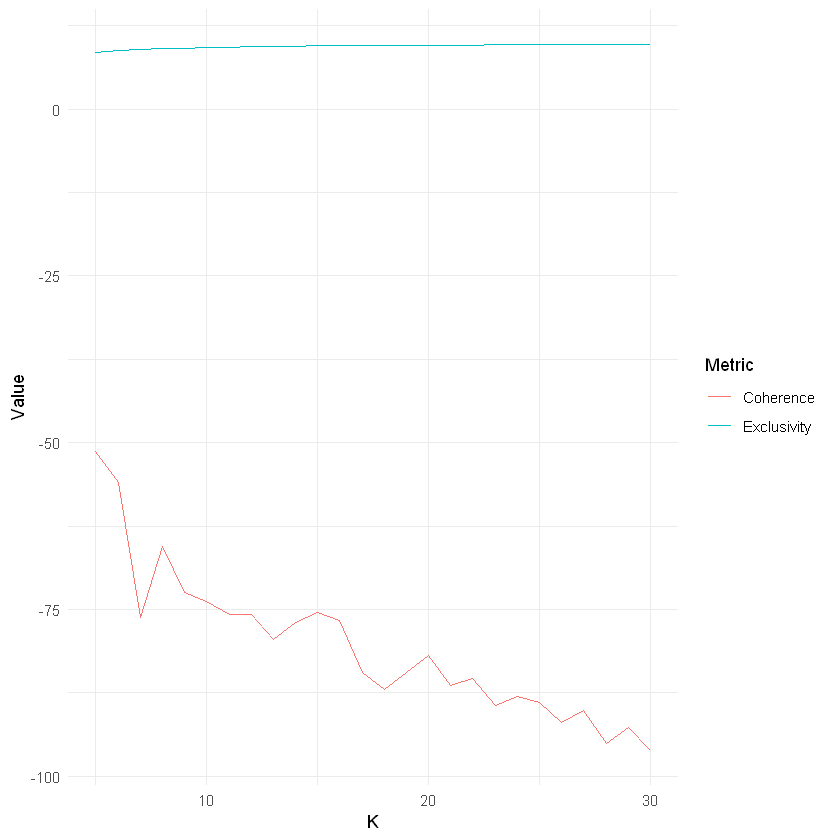

In [5]:
ggplot(df, aes(x = K)) +
  geom_line(aes(y = Coherence, color = "Coherence")) +
  geom_line(aes(y = Exclusivity, color = "Exclusivity")) +
  labs(y = "Value", color = "Metric") +  
  theme_minimal()

In [6]:
# choose the best K
stm_model <- stm(documents = documents, vocab = vocab, K = 9, data = data.frame(doc_id = 1:nrow(dtm)))

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	.........
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
.......................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -7.073) 
.......................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.665, relative change = 5.778e-02) 
.......................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -6.607, relativ

In [7]:
summary(stm_model)

A topic model with 9 topics, 2576 documents and a 11758 word dictionary.


Topic 1 Top Words:
 	 Highest Prob: part, invention, dioxide, film, agricultural, nano, titanium 
 	 FREX: polyhexamethylene, stearic, nanotitanium, guanidine, nanosulfur, titanium, dioxide 
 	 Lift: accelerator, adipateterephthalate, alliin, amyloliquefacien, antiinsect, bug, celecoxib 
 	 Score: part, film, polyhexamethylene, titanium, mulch, dioxide, guanidine 
Topic 2 Top Words:
 	 Highest Prob: invention, drug, preparation, method, solution, present, prepare 
 	 FREX: enrofloxacin, tilmicosin, nematode, albumin, amoxicillin, gastrointestinal, drug 
 	 Lift: aeruginosa, alphalactalbumin, attempt, azobenzene, bionanoselenium, biosafety, caffeic 
 	 Score: drug, veterinary, nanoemulsion, nematode, virus, capsule, pine 
Topic 3 Top Words:
 	 Highest Prob: fertilizer, invention, method, nutrient, soil, present, selenium 
 	 FREX: selenium, foliar, nitrogen, seleniumrich, nanoselenium, nutrient, seleniumenriched 
 	 Lift: aboveground, abundance, aestuarii, agrobacterium, anatase, aol, a

Topic 1 Top Words:
 	 Highest Prob: part, invention, dioxide, film, agricultural, nano, titanium 
 	 FREX: polyhexamethylene, stearic, nanotitanium, guanidine, nanosulfur, titanium, dioxide 
 	 Lift: accelerator, adipateterephthalate, alliin, amyloliquefacien, antiinsect, bug, celecoxib 
 	 Score: part, film, polyhexamethylene, titanium, mulch, dioxide, guanidine 
Topic 2 Top Words:
 	 Highest Prob: invention, drug, preparation, method, solution, present, prepare 
 	 FREX: enrofloxacin, tilmicosin, nematode, albumin, amoxicillin, gastrointestinal, drug 
 	 Lift: aeruginosa, alphalactalbumin, attempt, azobenzene, bionanoselenium, biosafety, caffeic 
 	 Score: drug, veterinary, nanoemulsion, nematode, virus, capsule, pine 
Topic 3 Top Words:
 	 Highest Prob: fertilizer, invention, method, nutrient, soil, present, selenium 
 	 FREX: selenium, foliar, nitrogen, seleniumrich, nanoselenium, nutrient, seleniumenriched 
 	 Lift: aboveground, abundance, aestuarii, agrobacterium, anatase, aol, a

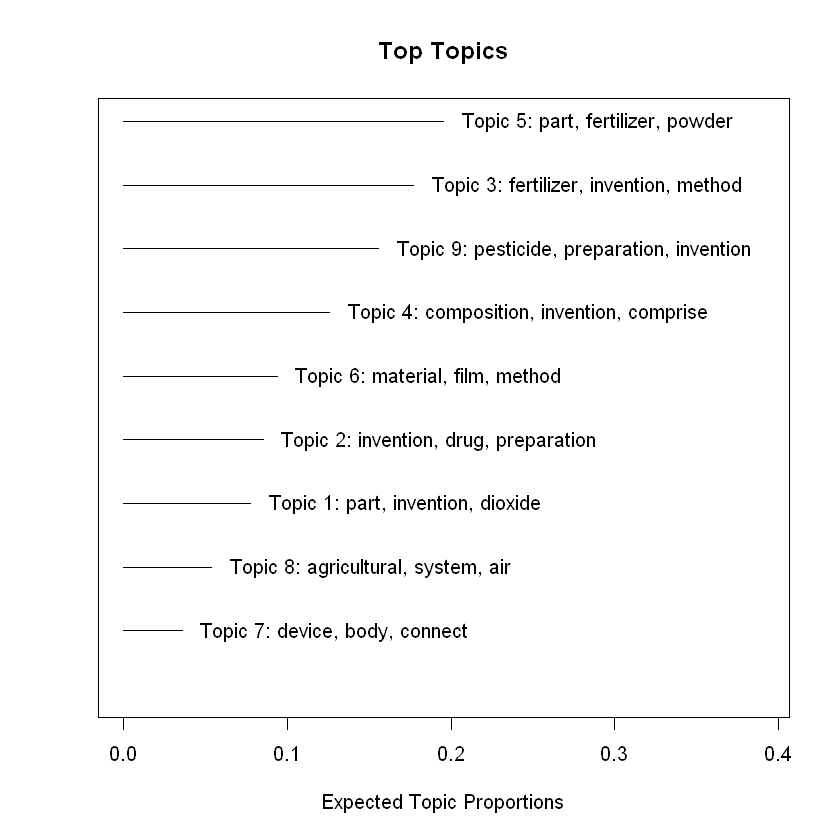

In [8]:
labelTopics(stm_model)

plot(stm_model)

In [9]:
# Gets the topic distribution for each document
doc_topics <- stm_model$theta

In [10]:
print(doc_topics)

                [,1]         [,2]        [,3]         [,4]         [,5]
   [1,] 0.0051713185 0.0092830885 0.856202140 1.105058e-02 3.011089e-02
   [2,] 0.0017468795 0.0077161659 0.005325169 9.573311e-01 6.463197e-04
   [3,] 0.0029974782 0.0108822820 0.008777890 9.271694e-01 1.186641e-03
   [4,] 0.0030914427 0.0198055955 0.020037239 8.279179e-01 1.976388e-03
   [5,] 0.0006347880 0.0032349407 0.009822645 5.360291e-03 1.164810e-03
   [6,] 0.0017077670 0.0059676265 0.576073145 1.236253e-02 9.771480e-03
   [7,] 0.0038783260 0.0066507825 0.006846836 8.083955e-01 9.744650e-04
   [8,] 0.0017554944 0.0060938171 0.004461641 9.542745e-01 5.462794e-04
   [9,] 0.0014246523 0.0067915657 0.004686724 9.640937e-01 5.375737e-04
  [10,] 0.7451870777 0.0250089782 0.008365526 1.534061e-01 6.292610e-03
  [11,] 0.1347777252 0.0465421419 0.147117724 4.704280e-01 2.062726e-02
  [12,] 0.0048335290 0.0034344289 0.007497121 2.018661e-01 1.476555e-03
  [13,] 0.0006262992 0.0026353413 0.002146689 9.848779e-01 2.004

In [11]:
write.csv(stm_model$theta, file = "stm_all.csv", row.names = FALSE)